## Introduction

About Zillow: Zillow's Economic Research Team collects, cleans and publishes housing and economic data from a variety of public and proprietary sources. Public property record data filed with local municipalities -- including deeds, property facts, parcel information and transactional histories -- forms the backbone of our data products, and is fleshed out with proprietary data derived from property listings and user behavior on Zillow.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


## Loading the Dataset

In [2]:
County_time_series=pd.read_csv('./zillow_data/County_time_series.csv',parse_dates=True)
County_crosswalk=pd.read_csv('./zillow_data/CountyCrossWalk_Zillow.csv',parse_dates=True)
Data_dict=pd.read_csv('./zillow_data/DataDictionary.csv',parse_dates=True)
Metro=pd.read_csv('./zillow_data/Metro_time_series.csv',parse_dates=True)
Neighborhood=pd.read_csv('./zillow_data/Neighborhood_time_series.csv',parse_dates=True)
Zip_time_series=pd.read_csv('./zillow_data/Zip_time_series.csv',parse_dates=True)
df_city_time_seris = pd.read_csv('./zillow_data/City_time_series.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
State_time_series=pd.read_csv('./zillow_data/State_time_series.csv',parse_dates=True)
State_time_series.Date=pd.to_datetime(State_time_series.Date)
State_time_series['year'] = State_time_series.Date.dt.year
State_time_series.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental,year
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99500.0,79500.0,79000.0,140200.0,NaN,NaN,NaN,NaN,NaN,1996
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78900.0,103600.0,107500.0,168700.0,NaN,NaN,NaN,NaN,NaN,1996
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70300.0,64400.0,64500.0,115200.0,NaN,NaN,NaN,NaN,NaN,1996
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,136100.0,157900.0,162000.0,270600.0,NaN,NaN,NaN,NaN,NaN,1996
4,1996-04-30,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99400.0,128100.0,133600.0,209300.0,NaN,NaN,NaN,NaN,NaN,1996


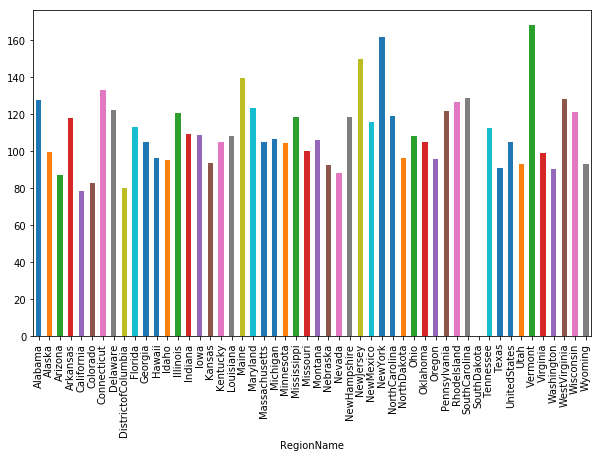

In [4]:
State_time_series.groupby(State_time_series.RegionName)['DaysOnZillow_AllHomes'].mean().plot(kind='bar',figsize=(10,6))

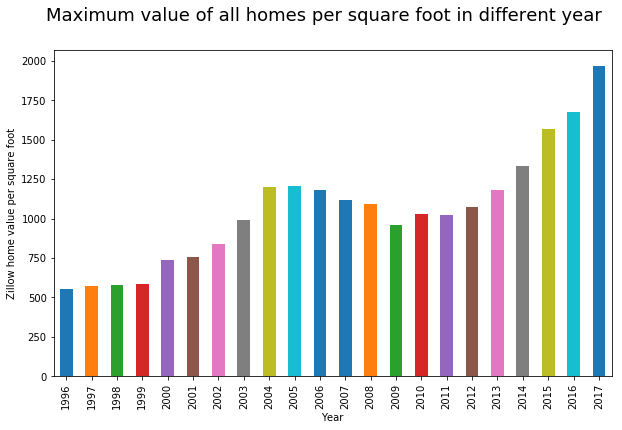

In [5]:
df_city_time_seris.Date = pd.to_datetime(df_city_time_seris.Date)
df_city_time_seris.groupby(df_city_time_seris.Date.dt.year)['ZHVIPerSqft_AllHomes'].max().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Maximum value of all homes per square foot in different year', fontsize=18)
plt.ylabel('Zillow home value per square foot')
plt.xlabel('Year')
plt.show()

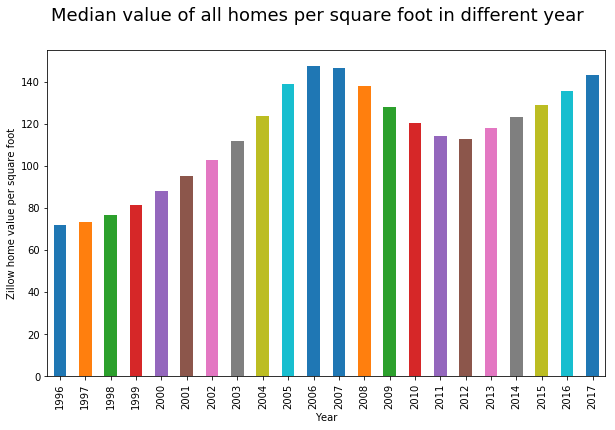

In [6]:
df_city_time_seris.Date = pd.to_datetime(df_city_time_seris.Date)
df_city_time_seris.groupby(df_city_time_seris.Date.dt.year)['ZHVIPerSqft_AllHomes'].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Median value of all homes per square foot in different year', fontsize=18)
plt.ylabel('Zillow home value per square foot')
plt.xlabel('Year')
plt.show()

In [7]:
def priceOverTime(data,label):
    """Plot price over time"""
    data.groupby(df_city_time_seris.Date.dt.year)['MedianListingPrice_AllHomes'].mean().plot(kind='bar', figsize=(10, 6), color='grey', edgecolor = 'black', linewidth = 2)
    plt.suptitle(label, fontsize=12)
    plt.ylabel('MedianSoldPrice_AllHomes')
    plt.xlabel('Year')
    plt.show()

In [8]:
States = ['California','Colorado','Michigan']
states_names = df_city_time_seris.loc[df_city_time_seris['RegionName'].isin(States)]
newdf3 = states_names.loc[df_city_time_seris['RegionName'] == 'California']
newdf4 = states_names.loc[df_city_time_seris['RegionName'] == 'Colorado']
newdf5 = states_names.loc[df_city_time_seris['RegionName'] == 'Michigan']


In [9]:
#priceOverTime(newdf3, "California")
#priceOverTime(newdf4, "California")
#priceOverTime(newdf5, "California")

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Text(0,0.5,'Price')

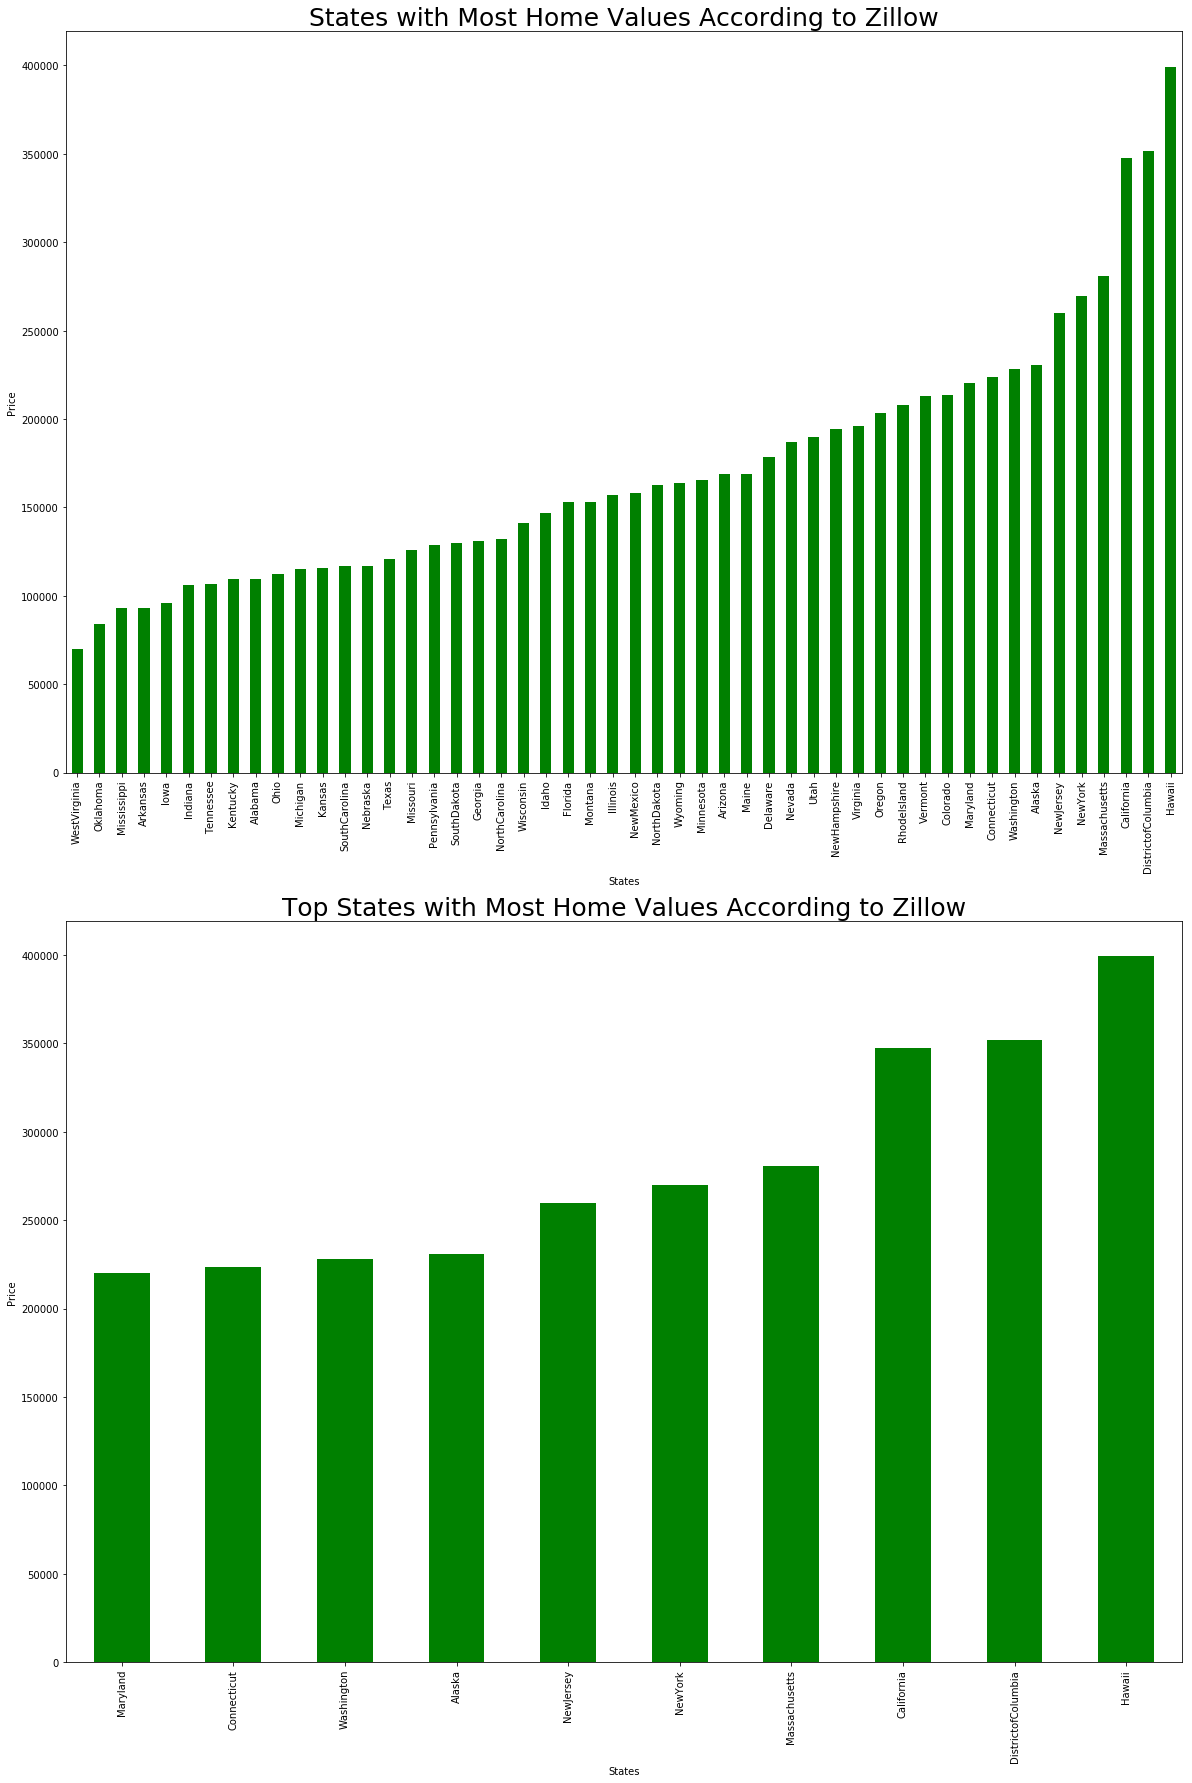

In [10]:
f, ax = plt.subplots(2,1, figsize=(20, 30))
state_without_null = State_time_series.dropna(subset=['ZHVI_AllHomes'], how='any') ## getting rid of null values
state_without_null.Date = state_without_null.Date.dt.year ## set date to year.

state_without_null.groupby(state_without_null.RegionName)['ZHVI_AllHomes'].mean().sort_values().plot( kind = 'bar', ax =ax[0], color = 'g')
ax[0].set_title('States with Most Home Values According to Zillow', fontsize = 25)
ax[0].set_xlabel('States')
ax[0].set_ylabel('Price')


state_without_null.groupby(state_without_null.RegionName)['ZHVI_AllHomes'].mean().sort_values().tail(10).plot(kind = 'bar',ax =ax[1], color = 'g')
ax[1].set_title('Top States with Most Home Values According to Zillow', fontsize = 25)
ax[1].set_xlabel('States')
ax[1].set_ylabel('Price')

In [11]:
top_states = state_without_null[(state_without_null.RegionName == "NewYork")|
                   (state_without_null.RegionName == "Washington")|
                   (state_without_null.RegionName == "Colorado")|
                   (state_without_null.RegionName == "Connecticut")|
                   (state_without_null.RegionName == "Maryland")|
                   (state_without_null.RegionName == "NewJersey")|
                   (state_without_null.RegionName == "Alaska")|
                   (state_without_null.RegionName == "Massachusetts")|
                   (state_without_null.RegionName == "California")|
                   (state_without_null.RegionName == "Hawaii")|
                   (state_without_null.RegionName == "DistrictofColumbia")]

Text(0.5,1,' ZHVI home values change in overtime for top expensive states')

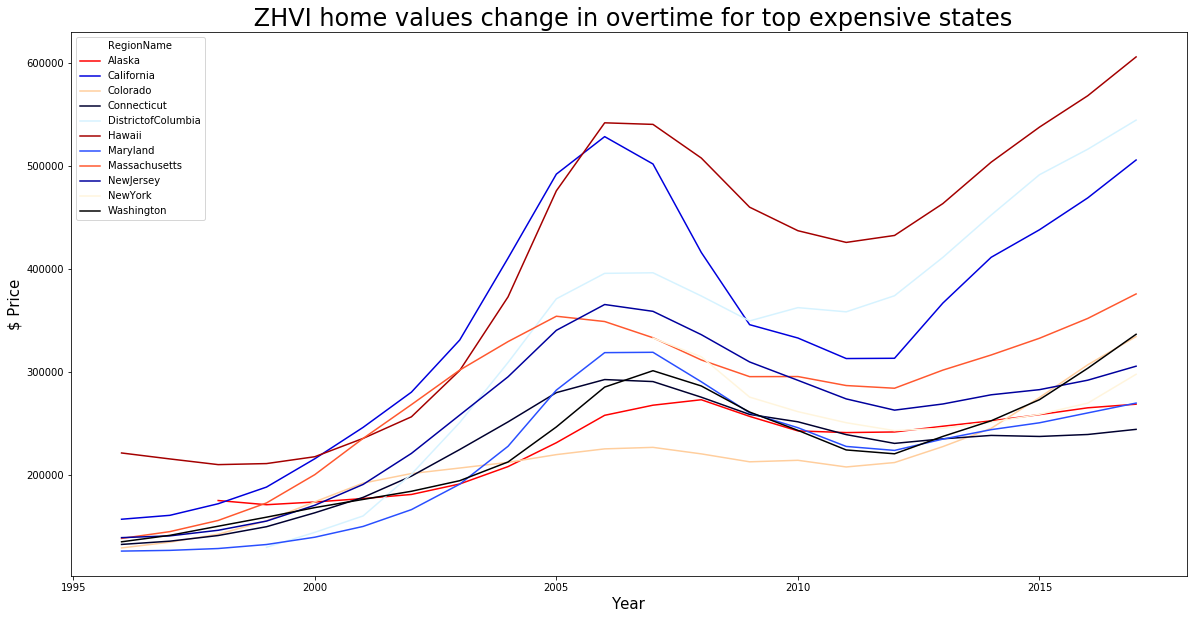

In [12]:
pd.pivot_table(top_states, 
               index="Date", 
               columns="RegionName", 
               values="ZHVI_AllHomes").plot(kind = 'line', figsize = (20,10),colormap='flag', legend = True)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("$ Price",  fontsize = 15)
plt.title(" ZHVI home values change in overtime for top expensive states", fontsize = 24)

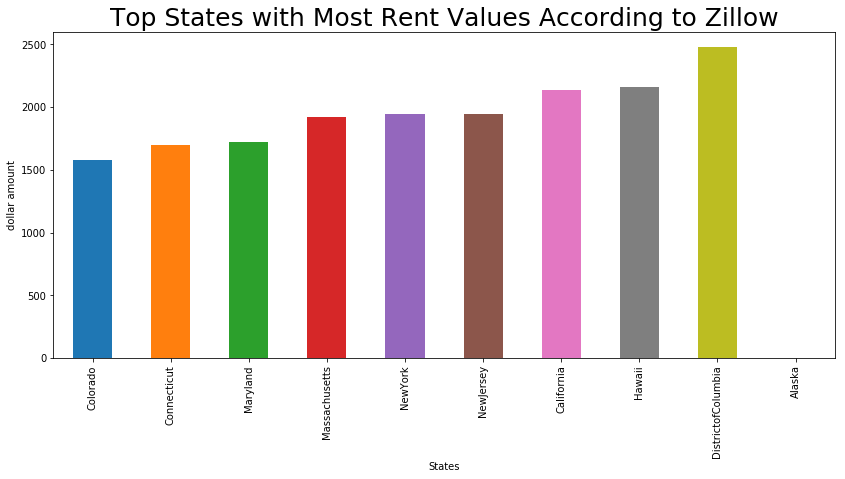

In [13]:
plt.subplots(figsize = (14,6))
state_without_null.groupby(state_without_null.RegionName)['ZRI_AllHomes'].mean().sort_values().tail(10).plot(kind = 'bar')
plt.title('Top States with Most Rent Values According to Zillow', fontsize = 25)
plt.xlabel('States')
plt.ylabel('dollar amount');

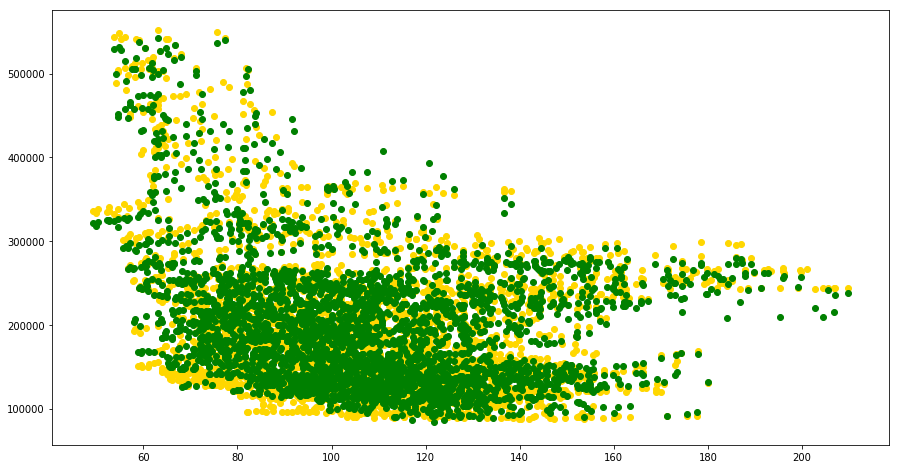

In [14]:
states = set(State_time_series[
    ~State_time_series['ZHVI_AllHomes'].isnull() &
    ~State_time_series['Sale_Prices'].isnull()
                      ]['RegionName'].values)

State_time_series_year = State_time_series[State_time_series['RegionName'].isin(states)].copy()
plt.figure(figsize=(15,8));

plt.scatter(State_time_series_year.DaysOnZillow_AllHomes,State_time_series_year.ZHVI_AllHomes, c="gold");
plt.scatter(State_time_series_year.DaysOnZillow_AllHomes,State_time_series_year.Sale_Prices, c ="green");

## Machine Learning part


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from fbprophet import Prophet
import squarify

In [21]:
State_data = State_time_series.dropna(subset=['DaysOnZillow_AllHomes'])
State_data = State_data.reset_index()


In [22]:
data_ml = State_data.drop(['DaysOnZillow_AllHomes','Date','RegionName'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_ml.values, 
                                              State_data['DaysOnZillow_AllHomes'].values,test_size=0.20, random_state=99)

In [23]:
lr = LinearRegression()
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
data_ml.info()

In [ ]:
data_ml  = data_ml[data_ml.columns[]]